In [9]:
import pandas as pd
col_list = ["close"]
loc = "C:/Users/akshi/Downloads/Machine Learning Py exercises/project/"
CapitalOne_df = pd.read_csv(loc + "CapitalOne.csv", usecols=col_list)
MasterCard_df = pd.read_csv(loc+"MasterCard.csv", usecols=col_list)
Chase_df = pd.read_csv(loc+"Chase.csv", usecols=col_list)
CitiGroup_df = pd.read_csv(loc+"CitiGroup.csv", usecols=col_list)
col_list1 = ["time"]
date_df = pd.read_csv("Chase.csv", usecols=col_list1)


In [10]:
finance_df = pd.concat([date_df, CapitalOne_df, Chase_df, CitiGroup_df, MasterCard_df], axis=1)

In [11]:
cols = []
count = 1
for column in finance_df.columns:
    if column == 'close':
        cols.append(f'Close_{count}')
        count+=1
        continue
    cols.append(column)
finance_df.columns = cols

In [12]:
finance_df

,time,Close_1,Close_2,Close_3,Close_4
0,2022-03-22 16:01:00,25.0600,90.270,57.550000,349.53
1,2022-03-22 16:00:00,25.1450,90.010,57.550000,349.53
2,2022-03-22 15:59:00,25.0500,90.000,57.550000,349.53
3,2022-03-22 15:53:00,25.0400,90.000,57.510000,350.00
4,2022-03-22 15:14:00,25.1072,90.195,57.510000,350.00
...,...,...,...,...,...
259703,NaN,NaN,NaN,36.710749,NaN
259704,NaN,NaN,NaN,36.487414,NaN
259705,NaN,NaN,NaN,36.478108,NaN
259706,NaN,NaN,NaN,36.524637,NaN


In [13]:
finance_df = finance_df.rename(columns = {"Close_1": "CAP", "Close_2": "CHS", "Close_3": "CITI", "Close_4":"MS"})

In [14]:
finance_df['time']= pd.to_datetime(finance_df['time'], format = '%Y-%m-%d')
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259708 entries, 0 to 259707
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    17343 non-null   datetime64[ns]
 1   CAP     4705 non-null    float64       
 2   CHS     17343 non-null   float64       
 3   CITI    259708 non-null  float64       
 4   MS      205455 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 MB


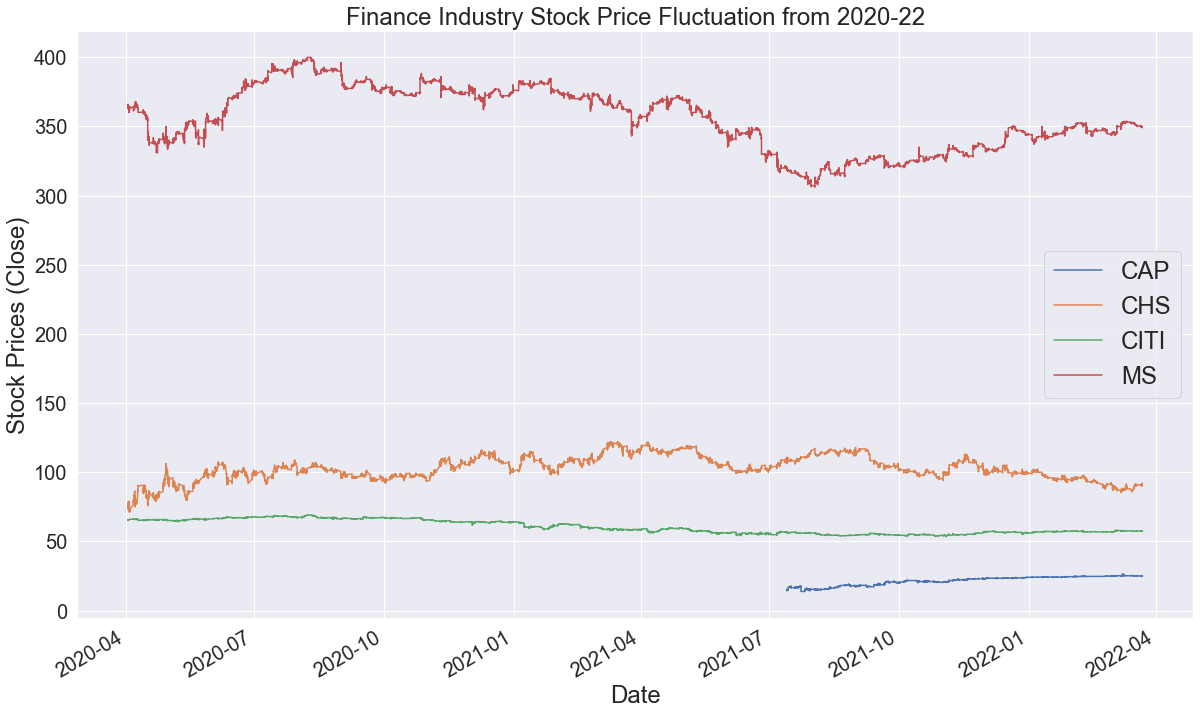

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

sns.set(rc={"figure.figsize":(20,12)}) 

finance_df.plot(x ='time', y= ['CAP','CHS', 'CITI', 'MS'], kind = 'line')

plt.title("Finance Industry Stock Price Fluctuation from 2020-22", fontsize = 24)

# adding Label to the x-axis
plt.xlabel('Date',fontsize=24)
plt.ylabel('Stock Prices (Close)',fontsize=24)
  
# adding legend to the curve
plt.legend(prop={'size': 24})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()